# TP Clustering / non-supervisé

Aujourd'hui, on utilisera les données proposées par scikit learn. Ces données sont déjà nettoyées, déjà prêtes dans la libraries. 
Pour commencer, importez les libraries : numpy, matplotlib et le module datasets de scikit-learn

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets

In [3]:
datasets?

Type:        module
String form: <module 'sklearn.datasets' from '/Users/theophilepace/miniconda3/lib/python3.6/site-packages/sklearn/datasets/__init__.py'>
File:        ~/miniconda3/lib/python3.6/site-packages/sklearn/datasets/__init__.py
Docstring:  
The :mod:`sklearn.datasets` module includes utilities to load datasets,
including methods to load and fetch popular reference datasets. It also
features some artificial data generators.


Maintenant, on va utiliser les fonctions suivantes de la librairie `dataset` : `datasets.make_circles`, `datasets.make_moons`, `datasets.make_blobs`, `datasets.make_blobs`.
Consultez la documentation intégrée de ces méthodes.
Vous pouvez trouver des exemples d'utilisation de ces méthodes sur https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html 
On prendra 1500 individus.

In [4]:
n_samples = 1500
random_state=42
# le random_state est un outil qui permet de fixer le caractère aléatoiretoujours le d'une méthode. 
# C'est à dire que si vous utiliser toujours random_state=42, vous générerez même dataset.
# vous pouvez essayer de changer le random state pour voir.
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)[0]
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)[0]
blobs = datasets.make_blobs(n_samples=n_samples, random_state=random_state)[0]
std_blobs = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)[0]

plt.scatter vous permet de tracer un `scatterplot`, c'est à dire un nuage de point ou graphe de répartition. Vous tracer simplement les points dans $R^2$

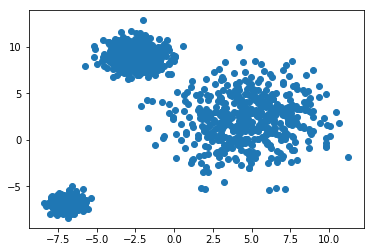

In [14]:
plt.scatter(std_blobs[:,0],std_blobs[:,1])

## Analyse exploratoire
Effectuer une pré analyse du jeu de données, afin de vous donner une intuition du jeu de données. Pour rappel, voici quelques étapes possibles:
- Lecture des infos données avec le dataset afin de connaître le contexte
- Prise en compte de la question associée au dataset
- Regarder la forme (shape) du dataset
- Faire quelques visualisations
- Chercher des valeurs aberrantes pour se donner une idée de la qualité du dataset
- Regarder la nature des variables (catégorielle, numérique, binaire), leur unité
==> se donner une intuition du dataset

Plus technique
- Effectuer PCA + visualization

En cas de classification / regression
- Le jeu de données est équilibré? (entre les classes, aura une influence sur les seuils)

In [7]:
for X in [blobs, std_blobs, noisy_circles, noisy_moons]:
    print(X.shape)

(1500, 2)
(1500, 2)
(1500, 2)
(1500, 2)


/Users/theophilepace/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


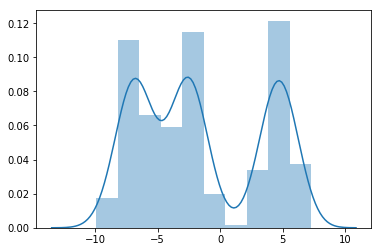

In [29]:
import seaborn as sns
sns.distplot(blobs[:,0])

Tracer les données générées dans le plan ($R^2$).
Commenter la difficulté du clustering. Utiliser la fonction `plt.scatter(X[:, 0], X[:, 1], s=10)`

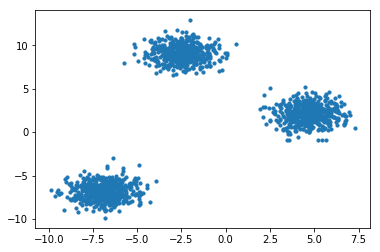

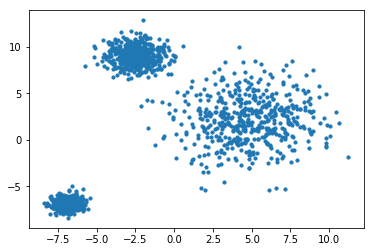

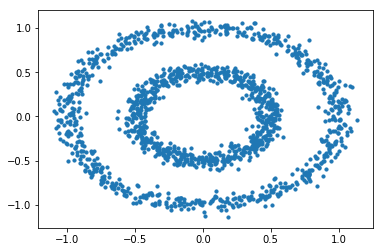

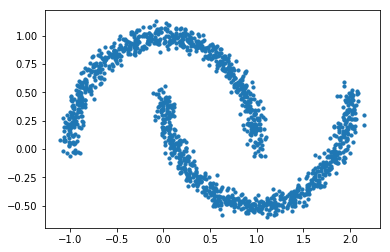

In [32]:
for X in [blobs, std_blobs, noisy_circles, noisy_moons]:
    fig, ax = plt.subplots()
    plt.scatter(X[:, 0], X[:, 1], s=10)

plt.show()

On peut voir que le clustering semble très facile dans les premiers: il n'y ni outlier (points aberrants) ni zône où les classes s'entremêlent. 

Ensuite, la forme des données est beaucoup moins propice au k-nns.

__Pour commencer, on fera toutes les analyses sur le dataset blobs. Ensuite, on essaiera sur les autres datasets__

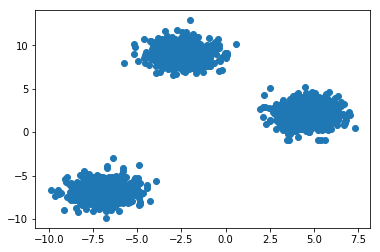

In [18]:
def plot_clustering(X,y:np.array=None):
    if y is None:
        plt.scatter(X[:,0],X[:,1])
    else:
        # comprehension_list_colors = [color_map[y_clust] for y_clust in y]
        plt.scatter(X[:,0],X[:,1],c=y)
    plt.show()
plot_clustering(blobs)

# K-means
Utilisez les k-means sur chacun des datasets. C'est ici https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html __Conseil:__ : Une cellule par dataset pour plus de clarté.
Pour rappel, cela consiste à chercher à minimiser un critère (en l'occurence la viriance intra-classe, c'est à dire la distance de chaque point au milieu de sa classe) de manière itérative. Par exemple, sur ce schéma volé à wikipédia:


![](https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif)


Utiliser la méthode des k-means de la documentation scikit-learn sur le dataset blobs.

In [9]:
from sklearn.cluster import KMeans

Comment avez-vous choisi K ? Faites quelques tests, commentez les résultats. Gardez le meilleur hyperparmètre K. 

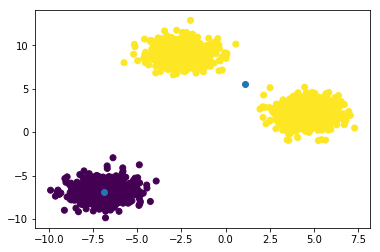

28109.86181430989


In [19]:
n_samples = len(blobs)
kmeans = KMeans(n_clusters=2)
pred = kmeans.fit_predict(blobs)
plot_clustering(blobs,pred)
print(kmeans.inertia_)

In [51]:
loss_function_naive = lambda inertia,k: inertia

def cluster_and_plot(dataset, K_max, loss_function):
    plot_clustering(dataset)
    inertias = {}
    for k in range(1,K_max):
        kmeans = KMeans(n_clusters=k)
        pred = kmeans.fit_predict(dataset)
        plot_clustering(dataset,pred)
        inertias[k] = loss_function(kmeans.inertia_,k)
        print(f"Intertia for k={k} computed with Within Class Variance:{inertias[k]}")
    plt.plot(inertias.keys(), inertias.values())
    return inertias

On essaye en ne prenant en compte que l'inertie, c'est à dire la distance au centre de la classe:

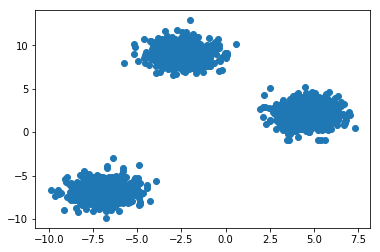

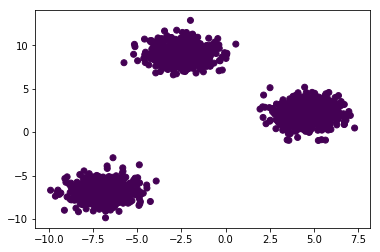

Intertia for k=1 computed with Within Class Variance:100658.30932717779


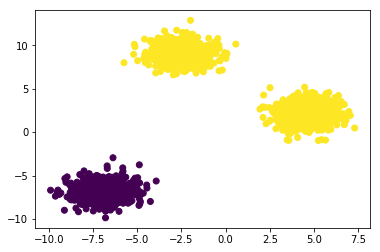

Intertia for k=2 computed with Within Class Variance:28109.86181430989


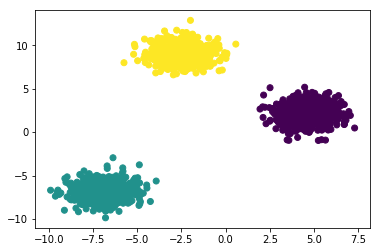

Intertia for k=3 computed with Within Class Variance:2925.3885084444346


Intertia for k=4 computed with Within Class Variance:2588.8913875657645


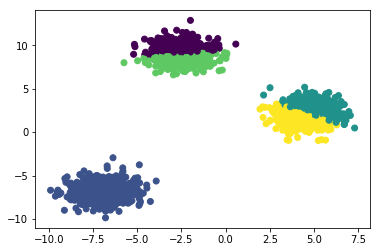

Intertia for k=5 computed with Within Class Variance:2263.456564209235


Intertia for k=6 computed with Within Class Variance:1945.119418320722


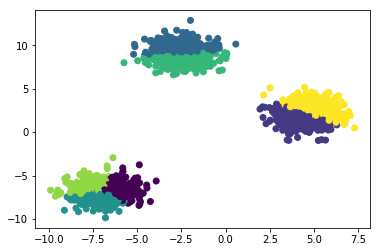

Intertia for k=7 computed with Within Class Variance:1744.3041840540013


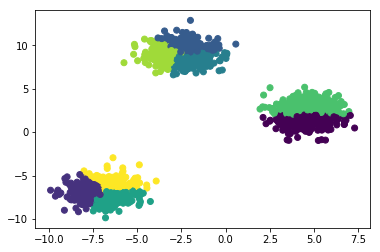

Intertia for k=8 computed with Within Class Variance:1529.0441434161046


Intertia for k=9 computed with Within Class Variance:1320.1392855128581


In [56]:
dico = cluster_and_plot(dataset=blobs, K_max=10, loss_function=loss_function_naive)


Maintenant, on essaye de changer la loost function. En effet, notre algorithme favorise toujours le nombre de centre le plus grand possible. On choisi donc une fonction de perte (fonction que l'on veut minimiser, qui représente en quelque sorte une quantité d'erreur).

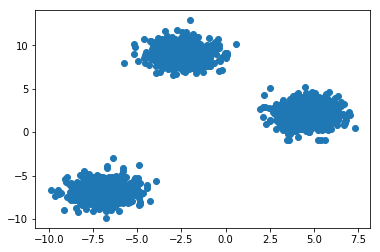

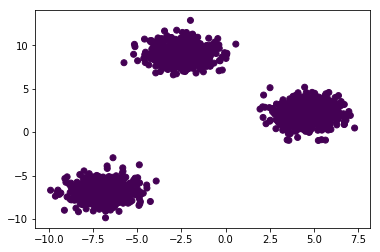

Intertia for k=1 computed with Within Class Variance:101658.30932717779


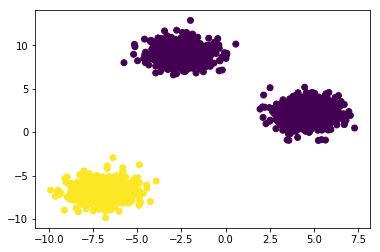

Intertia for k=2 computed with Within Class Variance:30109.86181430989


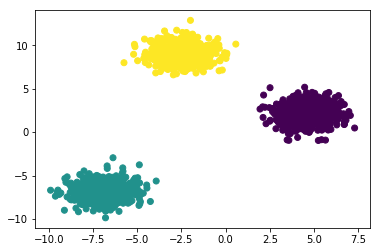

Intertia for k=3 computed with Within Class Variance:5925.388508444435


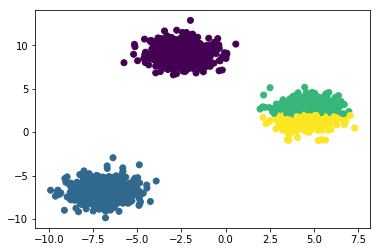

Intertia for k=4 computed with Within Class Variance:6589.622543476607


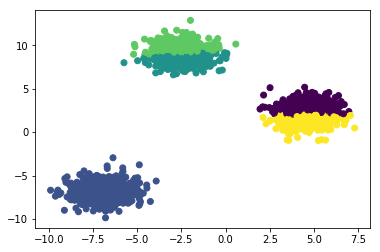

Intertia for k=5 computed with Within Class Variance:7263.020927317581


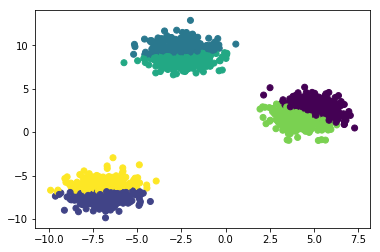

Intertia for k=6 computed with Within Class Variance:7945.410557701893


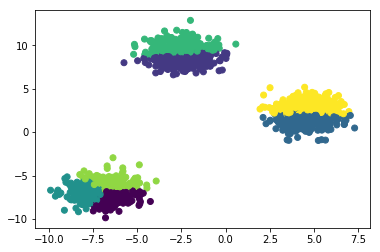

Intertia for k=7 computed with Within Class Variance:8727.084054228786


Intertia for k=8 computed with Within Class Variance:9518.027571511757


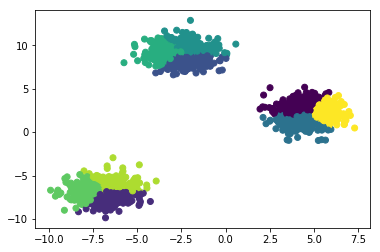

Intertia for k=9 computed with Within Class Variance:10320.374299866808


{1: 101658.30932717779,
 2: 30109.86181430989,
 3: 5925.388508444435,
 4: 6589.622543476607,
 5: 7263.020927317581,
 6: 7945.410557701893,
 7: 8727.084054228786,
 8: 9518.027571511757,
 9: 10320.374299866808}

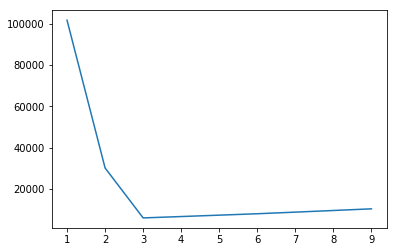

In [57]:
loss_function_parcimonieuse = lambda inertia,k:inertia + 1000*k
cluster_and_plot(dataset=blobs,K_max=10, loss_function=loss_function_parcimonieuse)

On voit maintenant que les paramètres trop grand ont une fonction de coût / loss function très haute. On atteint le minimum en 3. Cela parait logique, on a en effet 3 clusters dans le dataset.

Maintenant, utiliser les k-means sur les autres datasets:
- std_blobs
- noisy moons
- circles

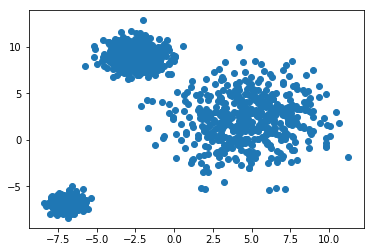

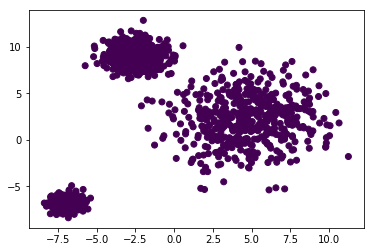

Intertia for k=1 computed with Within Class Variance:106793.93878686728


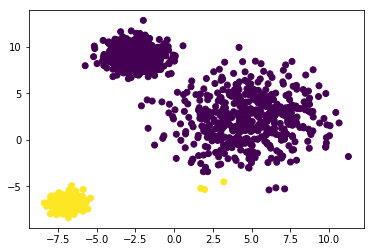

Intertia for k=2 computed with Within Class Variance:34405.36254156921


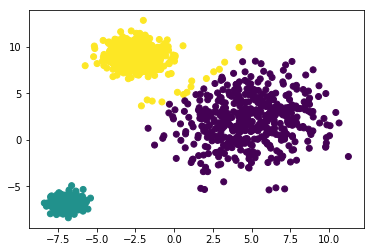

Intertia for k=3 computed with Within Class Variance:10132.158562264045


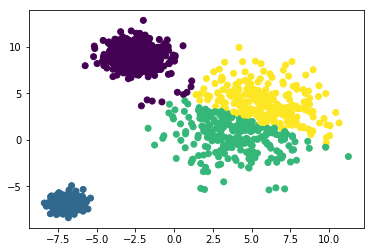

Intertia for k=4 computed with Within Class Variance:9087.753733926562


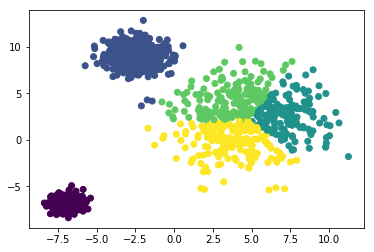

Intertia for k=5 computed with Within Class Variance:8934.020466628703


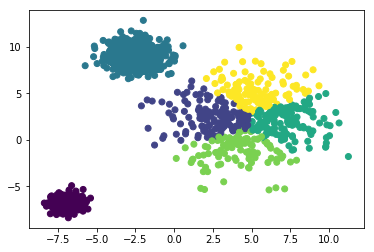

Intertia for k=6 computed with Within Class Variance:9303.979729113616


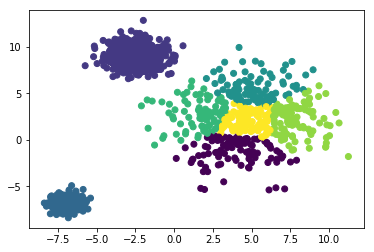

Intertia for k=7 computed with Within Class Variance:9944.77172585124


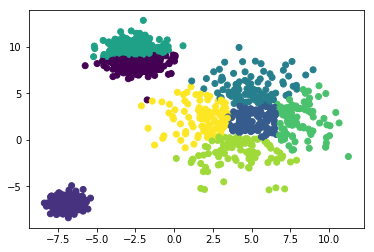

Intertia for k=8 computed with Within Class Variance:10621.312007959028


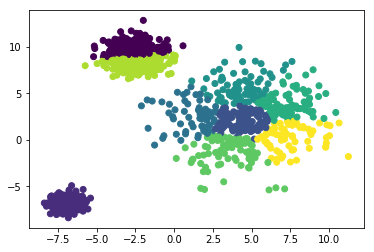

Intertia for k=9 computed with Within Class Variance:11331.410155128506


{1: 106793.93878686728,
 2: 34405.36254156921,
 3: 10132.158562264045,
 4: 9087.753733926562,
 5: 8934.020466628703,
 6: 9303.979729113616,
 7: 9944.77172585124,
 8: 10621.312007959028,
 9: 11331.410155128506}

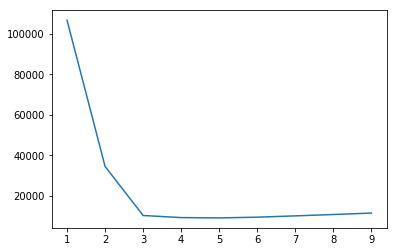

In [58]:
cluster_and_plot(std_blobs,10, loss_function_parcimonieuse )

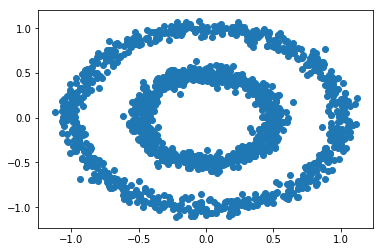

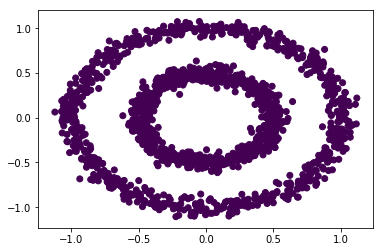

Intertia for k=1 computed with Within Class Variance:943.9534214598718


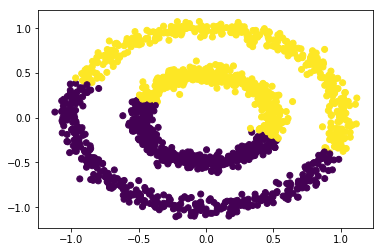

Intertia for k=2 computed with Within Class Variance:600.2977944436162


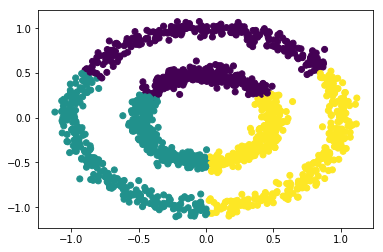

Intertia for k=3 computed with Within Class Variance:364.54498385858926


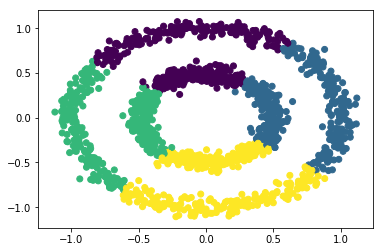

Intertia for k=4 computed with Within Class Variance:256.0221960874851


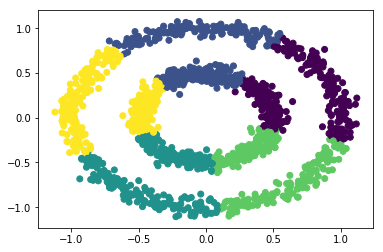

Intertia for k=5 computed with Within Class Variance:202.71433666815742


Intertia for k=6 computed with Within Class Variance:171.6015095492623


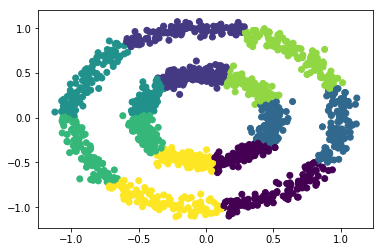

Intertia for k=7 computed with Within Class Variance:153.33567937109024


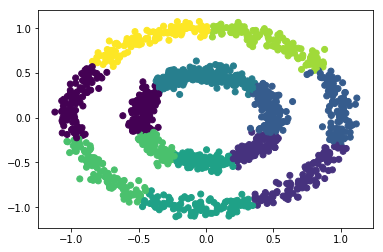

Intertia for k=8 computed with Within Class Variance:134.9917748423594


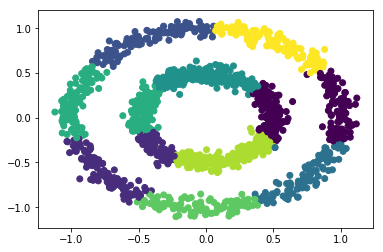

Intertia for k=9 computed with Within Class Variance:118.48161209887522


{1: 943.9534214598718,
 2: 600.2977944436162,
 3: 364.54498385858926,
 4: 256.0221960874851,
 5: 202.71433666815742,
 6: 171.6015095492623,
 7: 153.33567937109024,
 8: 134.9917748423594,
 9: 118.48161209887522}

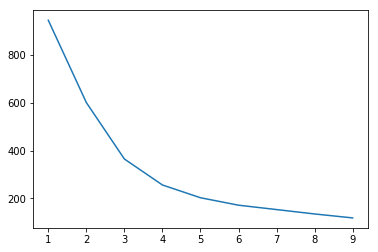

In [60]:
cluster_and_plot(noisy_circles,10, loss_function_naive)

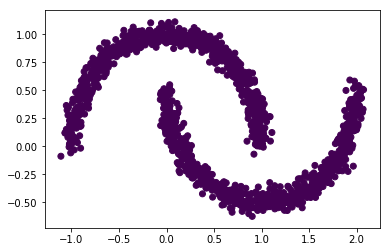

Intertia for k=1 computed with Within Class Variance:1500.2119957455116


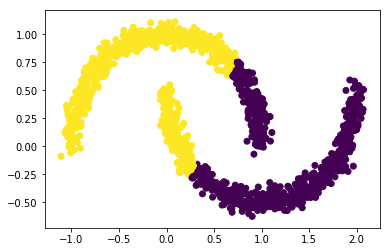

Intertia for k=2 computed with Within Class Variance:606.0553806035339


Intertia for k=3 computed with Within Class Variance:403.9532545258628


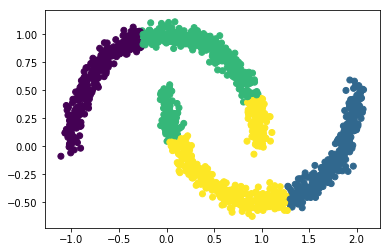

Intertia for k=4 computed with Within Class Variance:263.0988111877881


Intertia for k=5 computed with Within Class Variance:197.60813146666453


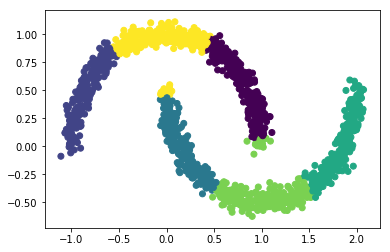

Intertia for k=6 computed with Within Class Variance:134.27520831987337


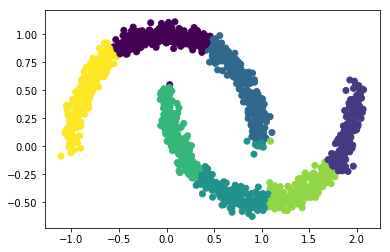

Intertia for k=7 computed with Within Class Variance:108.260468974106


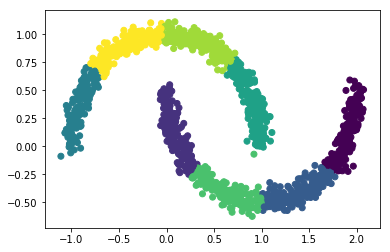

Intertia for k=8 computed with Within Class Variance:81.17421112372888


Intertia for k=9 computed with Within Class Variance:66.85696689796077


{1: 1500.2119957455116,
 2: 606.0553806035339,
 3: 403.9532545258628,
 4: 263.0988111877881,
 5: 197.60813146666453,
 6: 134.27520831987337,
 7: 108.260468974106,
 8: 81.17421112372888,
 9: 66.85696689796077}

In [61]:
cluster_and_plot(noisy_moons,10, loss_function_naive )

DAns les 2 derniers cas, les algorithmes ne sont pas du tout adaptés, on a eu de très mauvais résult, le meilleur paramètre semble être 1. Ce n'est pas logique, il faudrait utiliser unee autre technique, ou une transformation de variable.

# ACP / PCA / Principal Components Analysis
On a vu la PCA ce matin. Cette technique consiste à effectuer une rotation dans  l'espace vectoriel des données, afin de maximiser la variance (qui correspond à l'information portée par une variable) sur chaque axe. Par exemple, dans $R^2$:

![](https://upload.wikimedia.org/wikipedia/commons/f/f5/GaussianScatterPCA.svg)

La fonction Scikit pour cette transformation est `sklearn.decomposition.PCA`. À vrai dire, c'est un objet. Consulter la documentation rapidemment : https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html ou la doc intégrée.
Effectuez une PCA sur vos données avec 2 composantes. 

In [37]:
from sklearn.decomposition import PCA

In [38]:

pca_2 = PCA(n_components=2)
val = pca_2.fit(blobs)
print(pca_2.explained_variance_ratio_)  
val.components_

[0.75042574 0.24957426]


array([[-0.45551194, -0.89022967],
       [ 0.89022967, -0.45551194]])

Commentez la variance que vous avez pu expliquer. 

In [39]:
new_values = val.fit_transform(blobs)
plt.scatter(new_values[:,0],new_values[:,1])
plt.scatter(blobs[:,0],blobs[:,1], c='r')

Chargez le jeu de données iris. Ce jeu de données est un dataset très connu, assez facile. 

In [40]:
iris = datasets.load_iris()
iris_data = iris['data']
pca = PCA(n_components=4)
val = pca.fit(iris_data)
print(pca.explained_variance_ratio_)  
val.components_

[0.92461872 0.05306648 0.01710261 0.00521218]


array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])

Effectuez une PCA. Quelle est la variance expliquée?

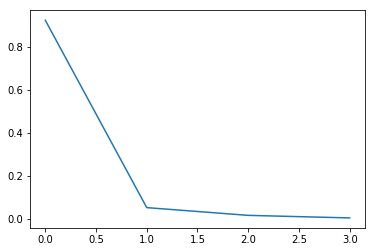

In [41]:
plt.plot(pca.explained_variance_ratio_)

Finalement, tracez ce jeu de données dans $R^2$. Est-il facile de retrouver des clusters?

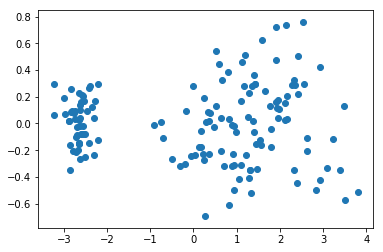

In [42]:
iris_pca = val.fit_transform(iris_data)
plt.scatter(iris_pca[:,0], iris_pca[:,1])
plt.show()
plt.scatter(iris_pca[:,0], iris_pca[:,2])
plt.show()
plt.scatter(iris_pca[:,1], iris_pca[:,2])
plt.show()

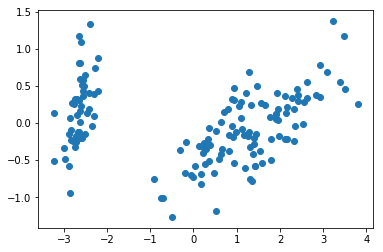

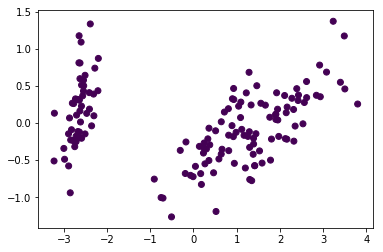

Intertia for k=1 computed with Within Class Variance:696.3706000000002


Intertia for k=2 computed with Within Class Variance:182.34795176035792


Intertia for k=3 computed with Within Class Variance:123.85144142614601


Intertia for k=4 computed with Within Class Variance:117.22847321428571


Intertia for k=5 computed with Within Class Variance:121.44618205128205


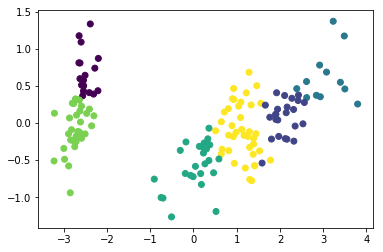

Intertia for k=6 computed with Within Class Variance:129.354255135061


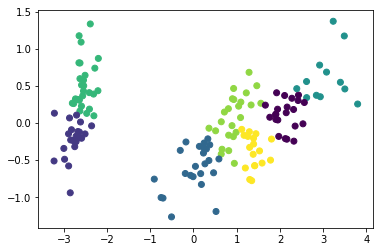

Intertia for k=7 computed with Within Class Variance:139.40900974025976


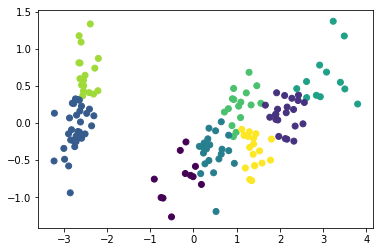

Intertia for k=8 computed with Within Class Variance:150.56895403615994


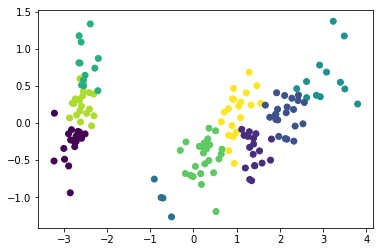

Intertia for k=9 computed with Within Class Variance:163.02312121212123


{1: 696.3706000000002,
 2: 182.34795176035792,
 3: 123.85144142614601,
 4: 117.22847321428571,
 5: 121.44618205128205,
 6: 129.354255135061,
 7: 139.40900974025976,
 8: 150.56895403615994,
 9: 163.02312121212123}

In [46]:
cluster_and_plot(iris_pca,10,lambda inertia,k:inertia + k*15)

# Si vous vous ennuyez
Si vous avez le temps, essayez de lancer un k-means sur les iris. Ensuite, effectuez une PCA, puis relancez des k-means.

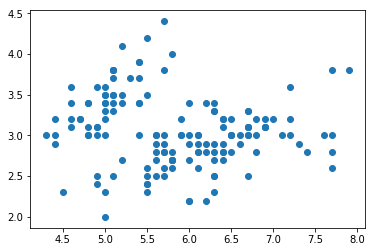

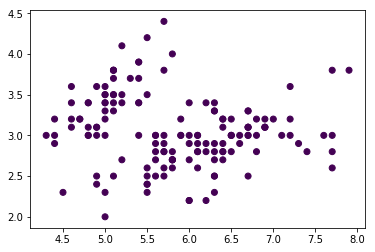

Intertia for k=1 computed with Within Class Variance:681.3706


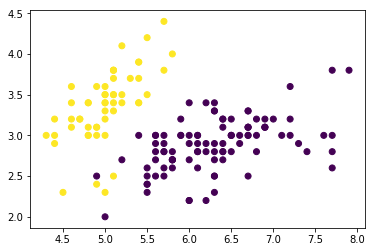

Intertia for k=2 computed with Within Class Variance:152.34795176035792


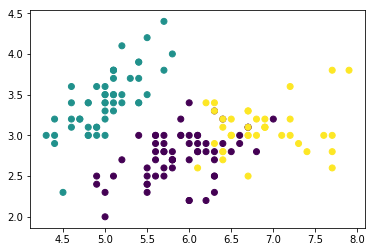

Intertia for k=3 computed with Within Class Variance:78.85144142614601


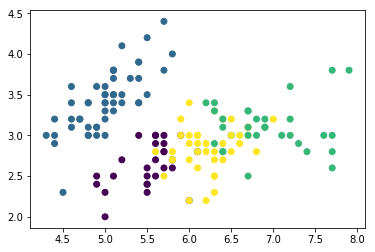

Intertia for k=4 computed with Within Class Variance:57.228473214285714


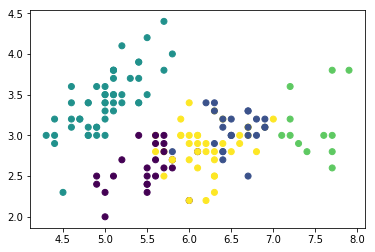

Intertia for k=5 computed with Within Class Variance:46.44618205128205


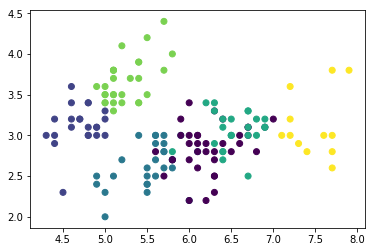

Intertia for k=6 computed with Within Class Variance:39.066035353535355


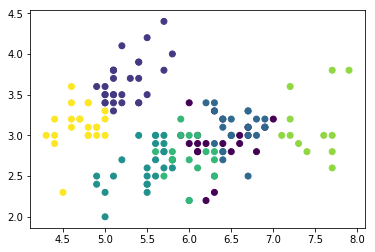

Intertia for k=7 computed with Within Class Variance:34.385897333584296


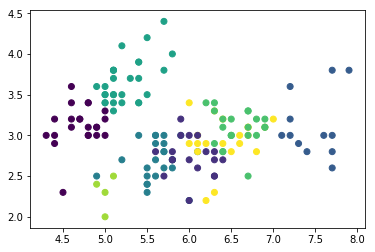

Intertia for k=8 computed with Within Class Variance:30.06459307359308


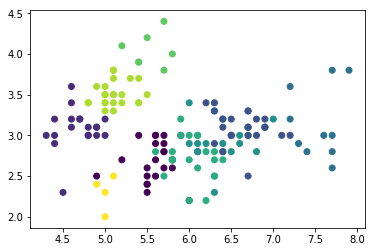

Intertia for k=9 computed with Within Class Variance:27.983390977443612


{1: 681.3706,
 2: 152.34795176035792,
 3: 78.85144142614601,
 4: 57.228473214285714,
 5: 46.44618205128205,
 6: 39.066035353535355,
 7: 34.385897333584296,
 8: 30.06459307359308,
 9: 27.983390977443612}

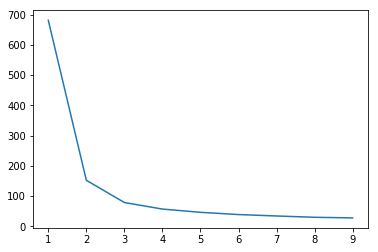

In [62]:
cluster_and_plot(iris_data,10,loss_function_naive)

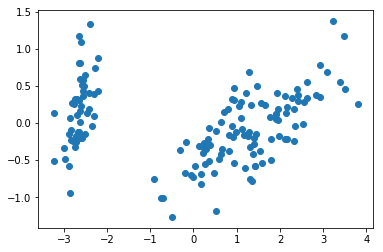

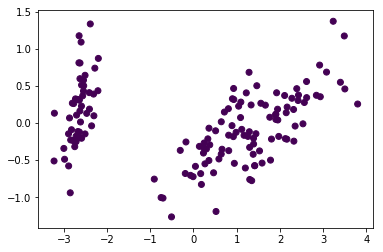

Intertia for k=1 computed with Within Class Variance:681.3706000000002


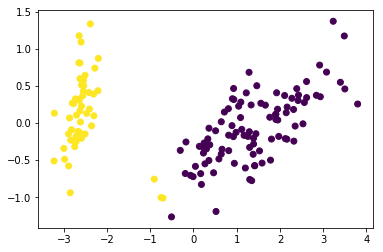

Intertia for k=2 computed with Within Class Variance:152.34795176035792


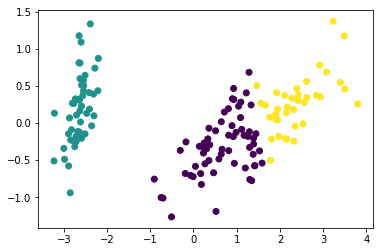

Intertia for k=3 computed with Within Class Variance:78.85144142614601


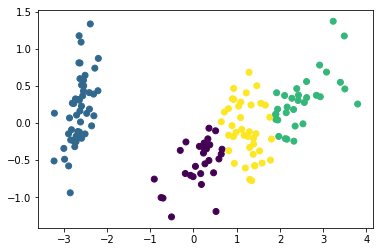

Intertia for k=4 computed with Within Class Variance:57.228473214285714


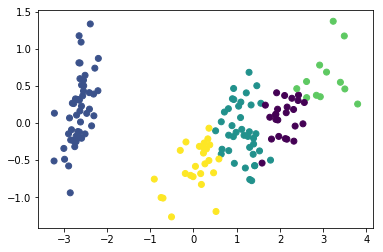

Intertia for k=5 computed with Within Class Variance:46.44618205128205


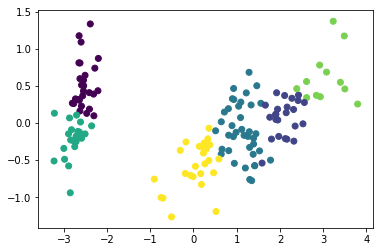

Intertia for k=6 computed with Within Class Variance:39.03998724608725


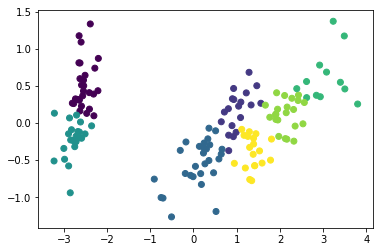

Intertia for k=7 computed with Within Class Variance:34.29822966507178


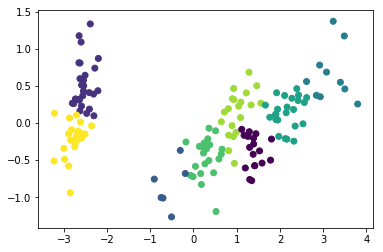

Intertia for k=8 computed with Within Class Variance:30.13784307359308


Intertia for k=9 computed with Within Class Variance:28.143600877192988


{1: 681.3706000000002,
 2: 152.34795176035792,
 3: 78.85144142614601,
 4: 57.228473214285714,
 5: 46.44618205128205,
 6: 39.03998724608725,
 7: 34.29822966507178,
 8: 30.13784307359308,
 9: 28.143600877192988}

In [63]:
cluster_and_plot(iris_pca,10,loss_function_naive)